In [3]:
import pandas as pd
df = pd.read_csv("D:/EXCELR/Project/tweet.csv")
df

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative
...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm
81404,I never knew..I better put this out to the Uni...,sarcasm
81405,hey just wanted to say thanks @ puberty for le...,sarcasm
81406,I'm sure coverage like the Fox News Special “T...,sarcasm


In [4]:
#Checking null spaces
df.isna().sum()
cleaned_df = df
cleaned_df

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative
...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm
81404,I never knew..I better put this out to the Uni...,sarcasm
81405,hey just wanted to say thanks @ puberty for le...,sarcasm
81406,I'm sure coverage like the Fox News Special “T...,sarcasm


In [5]:
cleaned_df = pd.DataFrame(cleaned_df)

In [6]:
# Check for duplicate tweets based on the text of the tweet
duplicates = cleaned_df[cleaned_df.duplicated(subset='tweets')]

# Print the duplicate tweets
print(duplicates)

# Remove duplicate tweets
cleaned_df = cleaned_df.drop_duplicates(subset='tweets', keep='first')

                                                  tweets       class
12617                                             #Irony  figurative
17820                                             #irony  figurative
21104                                           #sarcasm  figurative
21238  Fav moment in Sepp Blatter vid (0:20): "We hav...       irony
21239  Just found this while walking my human.... #ir...       irony
...                                                  ...         ...
80427  Approach, stick, and get infected. #funny #sar...     sarcasm
80432  Only newlyweds and liars have sex every day. #...     sarcasm
80435  @CoralieAlison YEAH! LETS GIVE WOMEN RIGHTS BY...     sarcasm
80463  Demolishing homes, targeting parents, stealing...     sarcasm
80464  I'm at the library and my phone has been dead ...     sarcasm

[13411 rows x 2 columns]


In [7]:
#nltk.download('punkt')

# Tokenize the tweets
cleaned_df['tweets'] = cleaned_df['tweets'].apply(nltk.word_tokenize)
cleaned_df

<IPython.core.display.Javascript object>

,tweets,class
0,"[Be, aware, dirty, step, to, get, money, #, st...",figurative
1,"[#, sarcasm, for, #, people, who, do, n't, und...",figurative
2,"[@, IminworkJeremy, @, medsingle, #, DailyMail...",figurative
3,"[@, wilw, Why, do, I, get, the, feeling, you, ...",figurative
4,"[-, @, TeacherArthurG, @, rweingarten, You, pr...",figurative
...,...,...
81403,"[Photo, :, Image, via, We, Heart, It, http, :,...",sarcasm
81404,"[I, never, knew, .., I, better, put, this, out...",sarcasm
81405,"[hey, just, wanted, to, say, thanks, @, pubert...",sarcasm
81406,"[I, 'm, sure, coverage, like, the, Fox, News, ...",sarcasm


In [8]:
cleaned_df['tweets'] = cleaned_df['tweets'].astype(str)
cleaned_df

,tweets,class
0,"['Be', 'aware', 'dirty', 'step', 'to', 'get', ...",figurative
1,"['#', 'sarcasm', 'for', '#', 'people', 'who', ...",figurative
2,"['@', 'IminworkJeremy', '@', 'medsingle', '#',...",figurative
3,"['@', 'wilw', 'Why', 'do', 'I', 'get', 'the', ...",figurative
4,"['-', '@', 'TeacherArthurG', '@', 'rweingarten...",figurative
...,...,...
81403,"['Photo', ':', 'Image', 'via', 'We', 'Heart', ...",sarcasm
81404,"['I', 'never', 'knew', '..', 'I', 'better', 'p...",sarcasm
81405,"['hey', 'just', 'wanted', 'to', 'say', 'thanks...",sarcasm
81406,"['I', ""'m"", 'sure', 'coverage', 'like', 'the',...",sarcasm


In [9]:
#remove special characters and punctuation from the 'tweets' column
import re

# Define a function to remove special characters and punctuation
def remove_special_chars(text):
    # Remove any URLs
    text = re.sub(r'http\S+', '', text)
    # Remove any non-alphanumeric characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove any digits
    text = re.sub(r'\d+', '', text)
     # Remove any mentions
    text = re.sub(r'@\w+', '', text)
    return text


In [10]:
# Apply the function to the 'tweets' column
cleaned_df['tweets'] = cleaned_df['tweets'].apply(remove_special_chars)
cleaned_df

,tweets,class
0,Be aware dirty step to get money staylight s...,figurative
1,sarcasm for people who do nt understand diy...,figurative
2,IminworkJeremy medsingle DailyMail readers ...,figurative
3,wilw Why do I get the feeling you like games ...,figurative
4,TeacherArthurG rweingarten You probably jus...,figurative
...,...,...
81403,Photo Image via We Heart It tcokyNfZOI chi...,sarcasm
81404,I never knew I better put this out to the Uni...,sarcasm
81405,hey just wanted to say thanks puberty for let...,sarcasm
81406,I m sure coverage like the Fox News Special T...,sarcasm


In [11]:
import nltk
#nltk.download('stopwords')  # download stopwords if not already downloaded
from nltk.corpus import stopwords


In [12]:

# Define the stopwords
stop_words = set(stopwords.words('english'))

# Apply stopwords removal using a lambda function
cleaned_df['tweets'] = cleaned_df['tweets'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))


In [13]:
cleaned_df

,tweets,class
0,aware dirty step get money staylight staywhite...,figurative
1,sarcasm people nt understand diy artattack tco...,figurative
2,iminworkjeremy medsingle dailymail readers sen...,figurative
3,wilw get feeling like games sarcasm,figurative
4,teacherarthurg rweingarten probably missed tex...,figurative
...,...,...
81403,photo image via heart tcokynfzoi childhood coo...,sarcasm
81404,never knew better put universe lol maybe date ...,sarcasm
81405,hey wanted say thanks puberty letting apart it...,sarcasm
81406,sure coverage like fox news special hidden har...,sarcasm


In [14]:
print(cleaned_df.isnull().sum())

tweets    0
class     0
dtype: int64


In [15]:
from nltk.stem import WordNetLemmatizer

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'tweets' column in the cleaned_df DataFrame
cleaned_df['tweets'] = cleaned_df['tweets'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Print the updated DataFrame
print(cleaned_df)


                                                  tweets       class
0      aware dirty step get money staylight staywhite...  figurative
1      sarcasm people nt understand diy artattack tco...  figurative
2      iminworkjeremy medsingle dailymail reader sens...  figurative
3                     wilw get feeling like game sarcasm  figurative
4      teacherarthurg rweingarten probably missed tex...  figurative
...                                                  ...         ...
81403  photo image via heart tcokynfzoi childhood coo...     sarcasm
81404  never knew better put universe lol maybe date ...     sarcasm
81405  hey wanted say thanks puberty letting apart it...     sarcasm
81406  sure coverage like fox news special hidden har...     sarcasm
81407               skeyno u wo nt believe see p sarcasm     sarcasm

[67997 rows x 2 columns]


In [16]:
#EDA Starts :-

# Number of tweets
num_tweets = len(cleaned_df['tweets'])

# Average tweet length
avg_tweet_length = cleaned_df['tweets'].apply(len).mean()

# Maximum tweet length
max_tweet_length = cleaned_df['tweets'].apply(len).max()

# Minimum tweet length
min_tweet_length = cleaned_df['tweets'].apply(len).min()

print("Number of tweets:", num_tweets)
print("Average tweet length:", avg_tweet_length)
print("Maximum tweet length:", max_tweet_length)
print("Minimum tweet length:", min_tweet_length)

Number of tweets: 67997
Average tweet length: 71.1418444931394
Maximum tweet length: 141
Minimum tweet length: 4


figurative    21235
regular       18569
sarcasm       15404
irony         12789
Name: class, dtype: int64


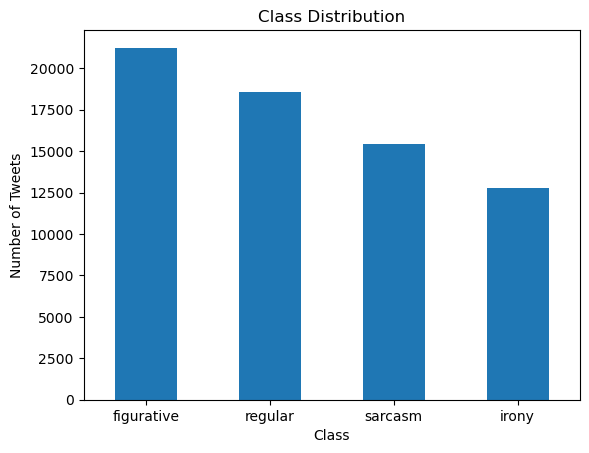

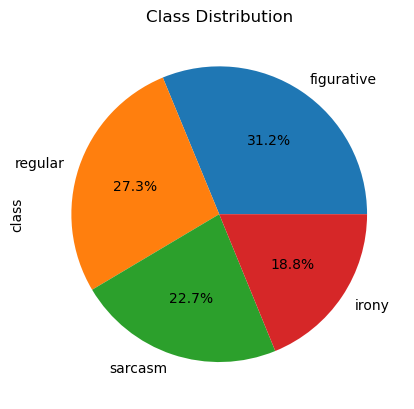

In [17]:
import matplotlib.pyplot as plt

# Count the number of tweets in each class
class_counts = cleaned_df['class'].value_counts()
print(class_counts)
# Plotting a bar chart
class_counts.plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Number of Tweets')
plt.title('Class Distribution')
plt.show()

# Plotting a pie chart
class_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()


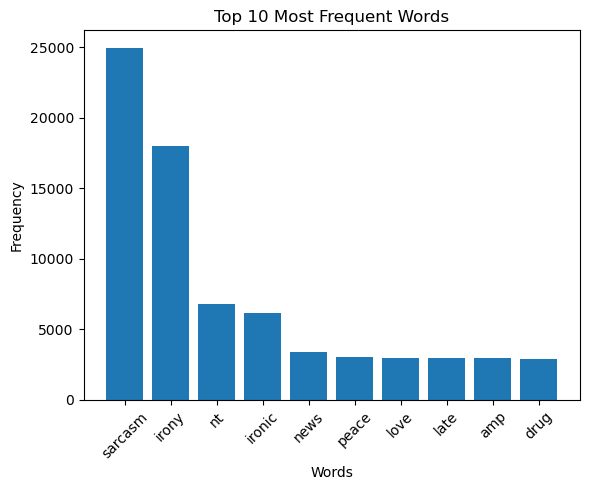

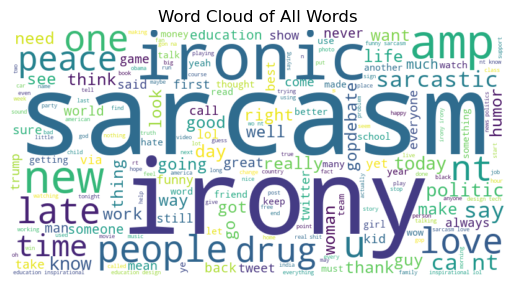

In [18]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tweets into a single string
all_tweets = ' '.join(cleaned_df['tweets'])

# Split the string into individual words
words = all_tweets.split()

# Count the frequency of each word
word_freq = Counter(words)

# Get the most common words and their frequencies
top_words = word_freq.most_common(10)

# Create a bar chart of the top words
x = [word[0] for word in top_words]
y = [count[1] for count in top_words]

plt.bar(x, y)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

# Create a word cloud of all words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Words')
plt.show()

In [19]:
# Separating Figurative classified data
tweets_figurative=cleaned_df[cleaned_df['class']=='figurative']
tweets_figurative

,tweets,class
0,aware dirty step get money staylight staywhite...,figurative
1,sarcasm people nt understand diy artattack tco...,figurative
2,iminworkjeremy medsingle dailymail reader sens...,figurative
3,wilw get feeling like game sarcasm,figurative
4,teacherarthurg rweingarten probably missed tex...,figurative
...,...,...
21233,come may favorite subject sarcasm,figurative
21234,landline day great business go telkomza sarcasm,figurative
21235,bad could nt prevented sarcasm vaccineswork tc...,figurative
21236,drink stella artois enjoy taste man eww lala s...,figurative


In [20]:
 # Create a dataframe from the list of words
df1 = pd.DataFrame(tweets_figurative)

In [21]:
df1.head()

,tweets,class
0,aware dirty step get money staylight staywhite...,figurative
1,sarcasm people nt understand diy artattack tco...,figurative
2,iminworkjeremy medsingle dailymail reader sens...,figurative
3,wilw get feeling like game sarcasm,figurative
4,teacherarthurg rweingarten probably missed tex...,figurative


In [22]:
# Get the preprocessed tweets column from cleaned_df
# Create unigrams
f_unigrams = df1["tweets"].apply(lambda x: x.lower().split())
f_unigrams

0        [aware, dirty, step, get, money, staylight, st...
1        [sarcasm, people, nt, understand, diy, artatta...
2        [iminworkjeremy, medsingle, dailymail, reader,...
3                [wilw, get, feeling, like, game, sarcasm]
4        [teacherarthurg, rweingarten, probably, missed...
                               ...                        
21233              [come, may, favorite, subject, sarcasm]
21234    [landline, day, great, business, go, telkomza,...
21235    [bad, could, nt, prevented, sarcasm, vaccinesw...
21236    [drink, stella, artois, enjoy, taste, man, eww...
21237    [scotlandteam, sterling, effort, old, chap, ch...
Name: tweets, Length: 21235, dtype: object

In [23]:
import nltk
from nltk import bigrams

# Create bigrams from unigrams
f_bigrams = f_unigrams.apply(lambda x: list(bigrams(x)))
f_bigrams

0        [(aware, dirty), (dirty, step), (step, get), (...
1        [(sarcasm, people), (people, nt), (nt, underst...
2        [(iminworkjeremy, medsingle), (medsingle, dail...
3        [(wilw, get), (get, feeling), (feeling, like),...
4        [(teacherarthurg, rweingarten), (rweingarten, ...
                               ...                        
21233    [(come, may), (may, favorite), (favorite, subj...
21234    [(landline, day), (day, great), (great, busine...
21235    [(bad, could), (could, nt), (nt, prevented), (...
21236    [(drink, stella), (stella, artois), (artois, e...
21237    [(scotlandteam, sterling), (sterling, effort),...
Name: tweets, Length: 21235, dtype: object

In [24]:
import nltk
from nltk import trigrams

# Create trigrams from unigrams
f_trigrams = f_unigrams.apply(lambda x: list(trigrams(x)))

f_trigrams


0        [(aware, dirty, step), (dirty, step, get), (st...
1        [(sarcasm, people, nt), (people, nt, understan...
2        [(iminworkjeremy, medsingle, dailymail), (meds...
3        [(wilw, get, feeling), (get, feeling, like), (...
4        [(teacherarthurg, rweingarten, probably), (rwe...
                               ...                        
21233    [(come, may, favorite), (may, favorite, subjec...
21234    [(landline, day, great), (day, great, business...
21235    [(bad, could, nt), (could, nt, prevented), (nt...
21236    [(drink, stella, artois), (stella, artois, enj...
21237    [(scotlandteam, sterling, effort), (sterling, ...
Name: tweets, Length: 21235, dtype: object

In [25]:
from collections import Counter

# Flatten the lists of unigrams, bigrams, and trigrams
all_unigrams = [word for sublist in f_unigrams for word in sublist]
all_bigrams = [tuple(words) for sublist in f_bigrams for words in sublist]
all_trigrams = [tuple(words) for sublist in f_trigrams for words in sublist]

# Calculate the frequency of each word
unigram_counts = Counter(all_unigrams)
bigram_counts = Counter(all_bigrams)
trigram_counts = Counter(all_trigrams)

# Get the top 100 most frequently used words
top_100_unigrams = unigram_counts.most_common(100)
top_100_bigrams = bigram_counts.most_common(100)
top_100_trigrams = trigram_counts.most_common(100)


In [26]:
# Separating Irony classified data
tweets_irony=cleaned_df[cleaned_df['class']=='irony']
df2 = pd.DataFrame(tweets_irony)
df2

,tweets,class
21240,disrespected wife prophet pseudo libtards play...,irony
21244,looking forward next week stepping away flash ...,irony
21245,get work realize oatmeal packet grabbed dinooa...,irony
21247,weirdtobe waise blocking mean nida awesome u r...,irony
21248,jillhs stated want destroy caliphate given way...,irony
...,...,...
42127,wow harmonizer nice irony tcowcdbmjtt,irony
42128,bad sign stacking bin apple foot high forklift...,irony
42129,english fan booing drop goal attempt wale iron...,irony
42130,finally city pope ironic popepaloozak,irony


In [27]:
# Create unigrams

i_unigrams = df2["tweets"].apply(lambda x: x.lower().split())
i_unigrams

21240    [disrespected, wife, prophet, pseudo, libtards...
21244    [looking, forward, next, week, stepping, away,...
21245    [get, work, realize, oatmeal, packet, grabbed,...
21247    [weirdtobe, waise, blocking, mean, nida, aweso...
21248    [jillhs, stated, want, destroy, caliphate, giv...
                               ...                        
42127          [wow, harmonizer, nice, irony, tcowcdbmjtt]
42128    [bad, sign, stacking, bin, apple, foot, high, ...
42129    [english, fan, booing, drop, goal, attempt, wa...
42130          [finally, city, pope, ironic, popepaloozak]
42131    [john_hudson, adagioforstring, millenial, bill...
Name: tweets, Length: 12789, dtype: object

In [28]:
import nltk
from nltk import bigrams

# Create bigrams from unigrams
i_bigrams = i_unigrams.apply(lambda x: list(bigrams(x)))
i_bigrams

21240    [(disrespected, wife), (wife, prophet), (proph...
21244    [(looking, forward), (forward, next), (next, w...
21245    [(get, work), (work, realize), (realize, oatme...
21247    [(weirdtobe, waise), (waise, blocking), (block...
21248    [(jillhs, stated), (stated, want), (want, dest...
                               ...                        
42127    [(wow, harmonizer), (harmonizer, nice), (nice,...
42128    [(bad, sign), (sign, stacking), (stacking, bin...
42129    [(english, fan), (fan, booing), (booing, drop)...
42130    [(finally, city), (city, pope), (pope, ironic)...
42131    [(john_hudson, adagioforstring), (adagioforstr...
Name: tweets, Length: 12789, dtype: object

In [29]:
import nltk
from nltk import trigrams

# Create trigrams from unigrams
i_trigrams = i_unigrams.apply(lambda x: list(trigrams(x)))
i_trigrams

21240    [(disrespected, wife, prophet), (wife, prophet...
21244    [(looking, forward, next), (forward, next, wee...
21245    [(get, work, realize), (work, realize, oatmeal...
21247    [(weirdtobe, waise, blocking), (waise, blockin...
21248    [(jillhs, stated, want), (stated, want, destro...
                               ...                        
42127    [(wow, harmonizer, nice), (harmonizer, nice, i...
42128    [(bad, sign, stacking), (sign, stacking, bin),...
42129    [(english, fan, booing), (fan, booing, drop), ...
42130    [(finally, city, pope), (city, pope, ironic), ...
42131    [(john_hudson, adagioforstring, millenial), (a...
Name: tweets, Length: 12789, dtype: object

In [30]:
from collections import Counter

# Flatten the lists of unigrams, bigrams, and trigrams
all_unigrams2 = [word for sublist in i_unigrams for word in sublist]
all_bigrams2 = [tuple(words) for sublist in i_bigrams for words in sublist]
all_trigrams2 = [tuple(words) for sublist in i_trigrams for words in sublist]

# Calculate the frequency of each word
unigram_counts2 = Counter(all_unigrams2)
bigram_counts2 = Counter(all_bigrams2)
trigram_counts2 = Counter(all_trigrams2)

# Get the top 100 most frequently used words
top_100_unigrams2 = unigram_counts2.most_common(100)
top_100_bigrams2 = bigram_counts2.most_common(100)
top_100_trigrams2 = trigram_counts2.most_common(100)


In [31]:
top_100_unigrams2

[('irony', 9975),
 ('ironic', 3213),
 ('nt', 1398),
 ('people', 707),
 ('amp', 690),
 ('like', 540),
 ('one', 526),
 ('get', 523),
 ('u', 482),
 ('day', 479),
 ('time', 396),
 ('say', 391),
 ('love', 344),
 ('want', 335),
 ('lol', 330),
 ('life', 324),
 ('would', 302),
 ('got', 300),
 ('ca', 300),
 ('today', 300),
 ('funny', 300),
 ('know', 292),
 ('make', 281),
 ('see', 264),
 ('think', 261),
 ('right', 261),
 ('thing', 256),
 ('work', 254),
 ('go', 253),
 ('good', 240),
 ('guy', 238),
 ('someone', 232),
 ('year', 226),
 ('yet', 221),
 ('new', 220),
 ('need', 214),
 ('way', 213),
 ('tweet', 213),
 ('man', 206),
 ('woman', 205),
 ('oh', 193),
 ('look', 193),
 ('really', 193),
 ('back', 186),
 ('come', 186),
 ('never', 186),
 ('last', 182),
 ('twitter', 177),
 ('take', 175),
 ('even', 174),
 ('said', 173),
 ('much', 172),
 ('going', 170),
 ('call', 162),
 ('first', 156),
 ('watching', 156),
 ('medium', 155),
 ('still', 154),
 ('called', 151),
 ('find', 149),
 ('well', 149),
 ('game', 14

In [33]:
# Separating Sarcasm classified data
tweets_sarcasm=cleaned_df[cleaned_df['class']=='sarcasm']
df3 = pd.DataFrame(tweets_sarcasm)
df3

# Create unigrams

s_unigrams = df3["tweets"].apply(lambda x: x.lower().split())

import nltk
from nltk import bigrams

# Create bigrams from unigrams
s_bigrams = s_unigrams.apply(lambda x: list(bigrams(x)))

import nltk
from nltk import trigrams

# Create trigrams from unigrams
s_trigrams = s_unigrams.apply(lambda x: list(trigrams(x)))

from collections import Counter

# Flatten the lists of unigrams, bigrams, and trigrams
all_unigrams3 = [word for sublist in s_unigrams for word in sublist]
all_bigrams3 = [tuple(words) for sublist in s_bigrams for words in sublist]
all_trigrams3 = [tuple(words) for sublist in s_trigrams for words in sublist]

# Calculate the frequency of each word
unigram_counts3 = Counter(all_unigrams3)
bigram_counts3 = Counter(all_bigrams3)
trigram_counts3 = Counter(all_trigrams3)

# Get the top 100 most frequently used words
top_100_unigrams3 = unigram_counts3.most_common(100)
top_100_bigrams3 = bigram_counts3.most_common(100)
top_100_trigrams3 = trigram_counts3.most_common(100)


In [34]:
top_100_trigrams3

[(('ca', 'nt', 'wait'), 106),
 (('got', 'ta', 'love'), 39),
 (('ca', 'nt', 'believe'), 33),
 (('nt', 'see', 'coming'), 25),
 (('see', 'coming', 'sarcasm'), 24),
 (('make', 'sense', 'sarcasm'), 19),
 (('much', 'fun', 'sarcasm'), 19),
 (('ca', 'nt', 'get'), 17),
 (('keep', 'getting', 'better'), 16),
 (('saw', 'coming', 'sarcasm'), 15),
 (('ca', 'nt', 'see'), 14),
 (('nt', 'wait', 'see'), 14),
 (('nt', 'know', 'sarcasm'), 13),
 (('ca', 'nt', 'imagine'), 13),
 (('getting', 'better', 'better'), 12),
 (('better', 'better', 'sarcasm'), 12),
 (('nt', 'even', 'know'), 12),
 (('nt', 'wait', 'sarcasm'), 12),
 (('great', 'day', 'sarcasm'), 12),
 (('study', 'show', 'sarcasm'), 12),
 (('show', 'sarcasm', 'actually'), 12),
 (('sarcasm', 'actually', 'good'), 12),
 (('first', 'day', 'school'), 12),
 (('customer', 'service', 'sarcasm'), 11),
 (('lowest', 'form', 'wit'), 11),
 (('harvard', 'study', 'show'), 11),
 (('last', 'night', 'sarcasm'), 11),
 (('ca', 'nt', 'even'), 11),
 (('nt', 'believe', 'sarcas

In [35]:
# Separating Regular classified data
tweets_regular=cleaned_df[cleaned_df['class']=='regular']
df4 = pd.DataFrame(tweets_regular)
df4

# Create unigrams

r_unigrams = df4["tweets"].apply(lambda x: x.lower().split())

import nltk
from nltk import bigrams

# Create bigrams from unigrams
r_bigrams = r_unigrams.apply(lambda x: list(bigrams(x)))

import nltk
from nltk import trigrams

# Create trigrams from unigrams
r_trigrams = r_unigrams.apply(lambda x: list(trigrams(x)))

from collections import Counter

# Flatten the lists of unigrams, bigrams, and trigrams
all_unigrams4 = [word for sublist in r_unigrams for word in sublist]
all_bigrams4 = [tuple(words) for sublist in r_bigrams for words in sublist]
all_trigrams4 = [tuple(words) for sublist in r_trigrams for words in sublist]

# Calculate the frequency of each word
unigram_counts4 = Counter(all_unigrams4)
bigram_counts4 = Counter(all_bigrams4)
trigram_counts4 = Counter(all_trigrams4)

# Get the top 100 most frequently used words
top_100_unigrams4 = unigram_counts4.most_common(100)
top_100_bigrams4 = bigram_counts4.most_common(100)
top_100_trigrams4 = trigram_counts4.most_common(100)


In [36]:
top_100_unigrams4

[('peace', 2961),
 ('news', 2941),
 ('drug', 2814),
 ('late', 2768),
 ('education', 2760),
 ('politics', 2584),
 ('humor', 2581),
 ('gopdebate', 1440),
 ('amp', 921),
 ('funny', 867),
 ('love', 826),
 ('lol', 742),
 ('nt', 742),
 ('u', 702),
 ('new', 628),
 ('design', 599),
 ('via', 598),
 ('day', 577),
 ('gop', 546),
 ('tech', 538),
 ('time', 517),
 ('trump', 480),
 ('night', 457),
 ('get', 441),
 ('inspirational', 440),
 ('life', 421),
 ('like', 420),
 ('one', 419),
 ('world', 387),
 ('say', 364),
 ('make', 354),
 ('school', 348),
 ('people', 338),
 ('quote', 334),
 ('good', 332),
 ('internet', 330),
 ('health', 309),
 ('gt', 309),
 ('today', 296),
 ('need', 288),
 ('video', 282),
 ('never', 280),
 ('go', 274),
 ('fun', 273),
 ('work', 266),
 ('see', 265),
 ('would', 264),
 ('know', 260),
 ('cnn', 259),
 ('find', 246),
 ('rt', 244),
 ('want', 242),
 ('business', 241),
 ('take', 239),
 ('writing', 237),
 ('live', 234),
 ('free', 233),
 ('tcot', 229),
 ('longreads', 229),
 ('great', 22

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Detach count from unigrams, bigrams, and trigrams
top_100_unigrams = [ngram[0] for ngram in top_100_unigrams]
top_100_bigrams = [ngram[0] for ngram in top_100_bigrams]
top_100_trigrams = [ngram[0] for ngram in top_100_trigrams]
top_100_unigrams2 = [ngram[0] for ngram in top_100_unigrams2]
top_100_bigrams2 = [ngram[0] for ngram in top_100_bigrams2]
top_100_trigrams2 = [ngram[0] for ngram in top_100_trigrams2]
top_100_unigrams3 = [ngram[0] for ngram in top_100_unigrams3]
top_100_bigrams3 = [ngram[0] for ngram in top_100_bigrams3]
top_100_trigrams3 = [ngram[0] for ngram in top_100_trigrams3]
top_100_unigrams4 = [ngram[0] for ngram in top_100_unigrams4]
top_100_bigrams4 = [ngram[0] for ngram in top_100_bigrams4]
top_100_trigrams4 = [ngram[0] for ngram in top_100_trigrams4]




In [39]:
top_100_trigrams4

[('education', 'inspirational', 'lol'),
 ('education', 'design', 'tech'),
 ('design', 'tech', 'longreads'),
 ('funnypictures', 'funnytweets', 'humor'),
 ('pict', 'funnypictures', 'funnytweets'),
 ('internet', 'browser', 'list'),
 ('internet', 'education', 'inspirational'),
 ('writing', 'education', 'inspirational'),
 ('news', 'politics', 'health'),
 ('tinder', 'fails', 'humor'),
 ('news', 'politics', 'intelmm'),
 ('politics', 'intelmm', 'osint'),
 ('gt', 'tcojfdzmyky', 'tinder'),
 ('tcojfdzmyky', 'tinder', 'fails'),
 ('pain', 'painkiller', 'drug'),
 ('inspirational', 'lol', 'funny'),
 ('painkiller', 'drug', 'tcoyhjfoiing'),
 ('type', 'men', 'would'),
 ('men', 'would', 'never'),
 ('would', 'never', 'date'),
 ('humor', 'offbeat', 'funny'),
 ('offbeat', 'funny', 'fun'),
 ('top', 'blogger', 'template'),
 ('blogger', 'education', 'inspirational'),
 ('inspirational', 'lol', 'fu'),
 ('find', 'writing', 'center'),
 ('web', 'design', 'hoting'),
 ('hosting', 'education', 'design'),
 ('wordpress'

In [2]:
"""# Combine unigrams, bigrams, and trigrams
combined_unigrams

combined_unigrams.extend(top_100_unigrams)
combined_bigrams.extend(top_100_bigrams)
combined_trigrams.extend(top_100_trigrams)
combined_unigrams.extend(top_100_unigrams2)
combined_bigrams.extend(top_100_bigrams2)
combined_trigrams.extend(top_100_trigrams2)
combined_unigrams.extend(top_100_unigrams3)
combined_bigrams.extend(top_100_bigrams3)
combined_trigrams.extend(top_100_trigrams3)
combined_unigrams.extend(top_100_unigrams4)
combined_bigrams.extend(top_100_bigrams4)
combined_trigrams.extend(top_100_trigrams4)
"""

'# Combine unigrams, bigrams, and trigrams\ncombined_unigrams\n\ncombined_unigrams.extend(top_100_unigrams)\ncombined_bigrams.extend(top_100_bigrams)\ncombined_trigrams.extend(top_100_trigrams)\ncombined_unigrams.extend(top_100_unigrams2)\ncombined_bigrams.extend(top_100_bigrams2)\ncombined_trigrams.extend(top_100_trigrams2)\ncombined_unigrams.extend(top_100_unigrams3)\ncombined_bigrams.extend(top_100_bigrams3)\ncombined_trigrams.extend(top_100_trigrams3)\ncombined_unigrams.extend(top_100_unigrams4)\ncombined_bigrams.extend(top_100_bigrams4)\ncombined_trigrams.extend(top_100_trigrams4)\n'

In [38]:
"""from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the input data to strings if they are not already
combined_unigrams = [str(doc) for doc in combined_unigrams]
combined_bigrams = [str(doc) for doc in combined_bigrams]
combined_trigrams = [str(doc) for doc in combined_trigrams]

# TF-IDF vectorizer for unigrams
unigram_vectorizer = TfidfVectorizer()
unigram_tfidf = unigram_vectorizer.fit_transform(combined_unigrams)

# TF-IDF vectorizer for bigrams
bigram_vectorizer = TfidfVectorizer(ngram_range=(2, 2))
bigram_tfidf = bigram_vectorizer.fit_transform(combined_bigrams)

# TF-IDF vectorizer for trigrams
trigram_vectorizer = TfidfVectorizer(ngram_range=(3, 3))
trigram_tfidf = trigram_vectorizer.fit_transform(combined_trigrams)

# Accessing feature names and TF-IDF scores for unigrams
unigram_features = unigram_vectorizer.get_feature_names_out()
unigram_scores = unigram_tfidf.toarray()

# Accessing feature names and TF-IDF scores for bigrams
bigram_features = bigram_vectorizer.get_feature_names_out()
bigram_scores = bigram_tfidf.toarray()

# Accessing feature names and TF-IDF scores for trigrams
trigram_features = trigram_vectorizer.get_feature_names_out()
trigram_scores = trigram_tfidf.toarray()

# Print the features and corresponding TF-IDF scores for unigrams
for i in range(len(combined_unigrams)):
    print("Document:", combined_unigrams[i])
    for j in range(len(unigram_features)):
        print("Feature:", unigram_features[j])
        print("TF-IDF Score:", unigram_scores[i][j])
    print()

# Print the features and corresponding TF-IDF scores for bigrams
for i in range(len(combined_bigrams)):
    print("Document:", combined_bigrams[i])
    for j in range(len(bigram_features)):
        print("Feature:", bigram_features[j])
        print("TF-IDF Score:", bigram_scores[i][j])
    print()

# Print the features and corresponding TF-IDF scores for trigrams
for i in range(len(combined_trigrams)):
    print("Document:", combined_trigrams[i])
    for j in range(len(trigram_features)):
        print("Feature:", trigram_features[j])
        print("TF-IDF Score:", trigram_scores[i][j])
    print()
"""

'from sklearn.feature_extraction.text import TfidfVectorizer\n\n# Convert the input data to strings if they are not already\ncombined_unigrams = [str(doc) for doc in combined_unigrams]\ncombined_bigrams = [str(doc) for doc in combined_bigrams]\ncombined_trigrams = [str(doc) for doc in combined_trigrams]\n\n# TF-IDF vectorizer for unigrams\nunigram_vectorizer = TfidfVectorizer()\nunigram_tfidf = unigram_vectorizer.fit_transform(combined_unigrams)\n\n# TF-IDF vectorizer for bigrams\nbigram_vectorizer = TfidfVectorizer(ngram_range=(2, 2))\nbigram_tfidf = bigram_vectorizer.fit_transform(combined_bigrams)\n\n# TF-IDF vectorizer for trigrams\ntrigram_vectorizer = TfidfVectorizer(ngram_range=(3, 3))\ntrigram_tfidf = trigram_vectorizer.fit_transform(combined_trigrams)\n\n# Accessing feature names and TF-IDF scores for unigrams\nunigram_features = unigram_vectorizer.get_feature_names_out()\nunigram_scores = unigram_tfidf.toarray()\n\n# Accessing feature names and TF-IDF scores for bigrams\nbigr

In [227]:
"""from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each tweet and assign sentiment labels
sentiments = cleaned_df['tweets'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize the sentiment labels as positive, negative, or neutral
sentiment_labels = ['Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral' for score in sentiments]

# Count the number of tweets in each sentiment category
sentiment_counts = pd.Series(sentiment_labels).value_counts()

# Plotting a pie chart
sentiment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

# Plotting a histogram
plt.hist(sentiments, bins=20, edgecolor='k')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Distribution')
plt.show()
"""

"from nltk.sentiment import SentimentIntensityAnalyzer\nimport matplotlib.pyplot as plt\n\n# Initialize the SentimentIntensityAnalyzer\nsia = SentimentIntensityAnalyzer()\n\n# Apply sentiment analysis to each tweet and assign sentiment labels\nsentiments = cleaned_df['tweets'].apply(lambda x: sia.polarity_scores(x)['compound'])\n\n# Categorize the sentiment labels as positive, negative, or neutral\nsentiment_labels = ['Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral' for score in sentiments]\n\n# Count the number of tweets in each sentiment category\nsentiment_counts = pd.Series(sentiment_labels).value_counts()\n\n# Plotting a pie chart\nsentiment_counts.plot(kind='pie', autopct='%1.1f%%')\nplt.title('Sentiment Distribution')\nplt.show()\n\n# Plotting a histogram\nplt.hist(sentiments, bins=20, edgecolor='k')\nplt.xlabel('Sentiment Score')\nplt.ylabel('Number of Tweets')\nplt.title('Sentiment Distribution')\nplt.show()\n"

top_100_trigrams2